<a href="https://colab.research.google.com/github/ahmedtarek-/MNS_CP_2022/blob/main/assignment_7/assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNS - CP - 7. Problem Set

### Assignment 7 (Hodgkin-Huxley Model)

Ahmed Abdalfatah - Alice Mahraffa

## 1. The HH model without any experimental current


**a) Deifining the alphas, betas and current equations**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Equations for potassium (K) channels
def alpha_n(voltage):
    return (0.01* (voltage +  55)) / (1 - np.exp(-0.1 * (voltage + 55) ))

def beta_n(voltage):
    return 0.125 * np.exp(-0.0125 * (voltage + 65) )

# Equations for sodium (K) channels
def alpha_m(voltage):
    return (0.1* (voltage +  40)) / (1 - np.exp(-0.1 * (voltage + 40) ))

def beta_m(voltage):
    return 4 * np.exp(-0.0556 * (voltage + 65) )

def alpha_h(voltage):
    return 0.07 * np.exp(-0.05 * (voltage + 65) )

def beta_h(voltage):
    return 1 / (1 + np.exp(-0.1 * (voltage + 35) ))

**b) Defining the current equations**

In [ ]:
K_REVERSAL  = -77          # mV
NA_REVERSAL = 50           # mV
L_REVERSAL  = -54.387      # mV
K_CONDUC    = 36*10**-12    # Siemens (should've been ^-9 but multiplied with 1000 to compensate for using milli votls)
NA_CONDUC   = 120*10**-12   # Siemens
L_CONDUC    = 0.3*10**-12   # Siemens

def k_current(voltage, n):
    return K_CONDUC * n**4 * (voltage - K_REVERSAL)

def na_current(voltage, m, h):
    return NA_CONDUC * m**3 * h * (voltage - NA_REVERSAL)

def leak_current(voltage):
    return L_CONDUC * (voltage - L_REVERSAL)

def exp_current(voltage):
    return 0

**c) Defining gate kinetics and the HH equation**

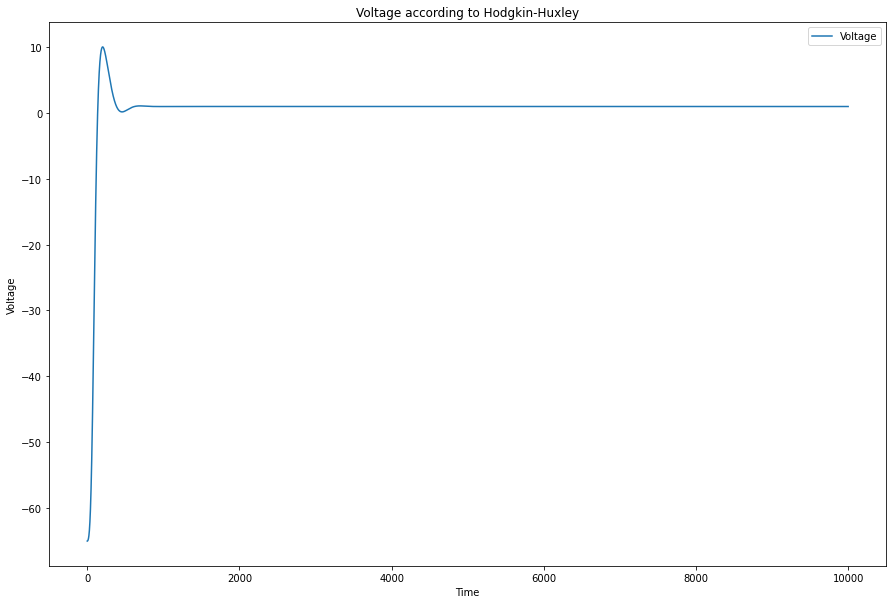

In [ ]:
Cm = 10**-15     # Farad (Should've been pico but changed to nano to compesnate for using mVolts)

def n_kinetics(n, voltage):
    return (alpha_n(voltage) * (1 - n)) - (beta_n(voltage) * n)

def m_kinetics(m, voltage):
    return (alpha_m(voltage) * (1 - m)) - (beta_m(voltage) * m)

def h_kinetics(h, voltage):
    return (alpha_h(voltage) * (1 - h)) - (beta_h(voltage) * h)

def hh_model(voltage, n, m, h):
  return 1/Cm * (exp_current(voltage) - na_current(voltage, m, h) - k_current(voltage, n) - leak_current(voltage))

def exp_current(voltage):
    # Returning nano Amp because we use mV instead of V. 
    return 0

V_THRESHOLD = -50   # mV

def hh_euler(initial_voltage, initial_n, initial_m, initial_h, t_max, dt):
    t=dt
    voltage_values = [initial_voltage]
    n_values = [initial_n]
    m_values = [initial_m]
    h_values = [initial_h]
    na_currents = [na_current(initial_voltage, initial_m, initial_h)]
    k_currents = [k_current(initial_voltage, initial_n)]
    n_spikes = 0
    while(t<=t_max):
        new_voltage = voltage_values[-1] + hh_model(voltage_values[-1], n_values[-1], m_values[-1], h_values[-1])*dt
        new_n = n_values[-1] + n_kinetics(new_voltage, n_values[-1])*dt
        new_m = m_values[-1] + m_kinetics(new_voltage, m_values[-1])*dt
        new_h = h_values[-1] + h_kinetics(new_voltage, h_values[-1])*dt
        n_values.append(new_n)
        m_values.append(new_m)
        h_values.append(new_h)
        voltage_values.append(new_voltage)
        na_currents.append(na_current(new_voltage, new_m, new_h))
        k_currents.append(k_current(new_voltage, new_n))
        t += dt
        if new_voltage > V_THRESHOLD:
          n_spikes += 1
    return voltage_values, n_values, m_values, h_values, na_currents, k_currents, n_spikes

initial_voltage = -65
initial_n = 0.3117
initial_m = 0.0529
initial_h = 0.5961
t_max = 1*10**-1
dt = 1*10**-5

voltage_values, n_values, m_values, h_values, _, _, _ = hh_euler(initial_voltage, initial_n, initial_m, initial_h, t_max, dt)

x_axis = np.arange(0, len(voltage_values), 1)

plt.figure(figsize=(15, 10))
plt.plot(x_axis, voltage_values, label="Voltage")
plt.title("Voltage according to Hodgkin-Huxley")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.show()


## 2. The HH model with experimental current (20 pA)

**a) Plotting the Voltage, currents and gating variabeles**

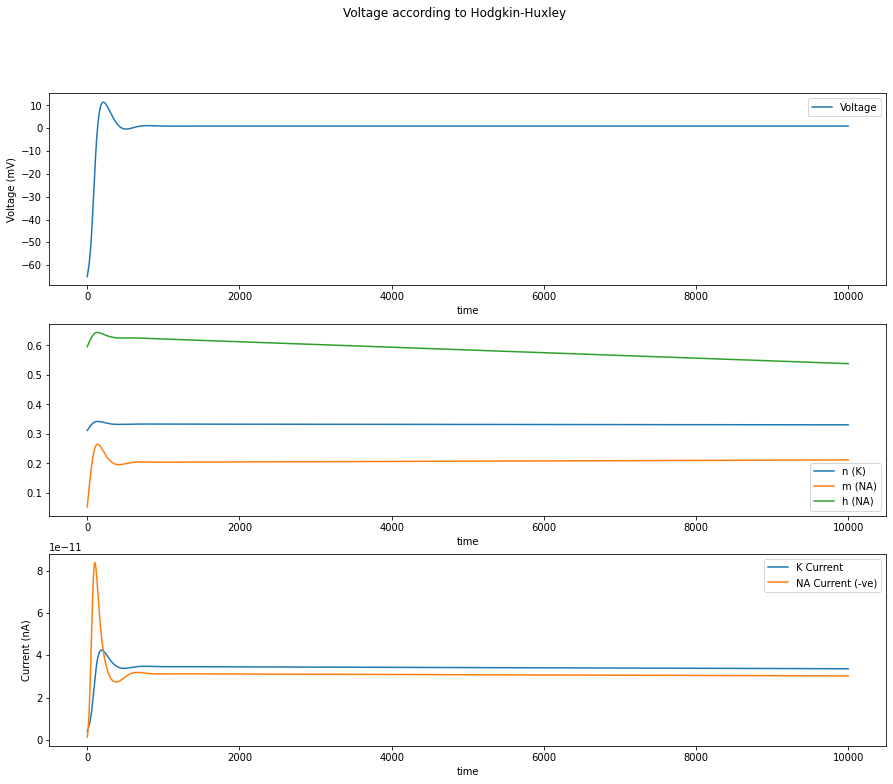


   - The motion of the currents show that initially the NA current floods in to the cell causing depolarization.
   - At a certain point Sodium starts moving outside of the cell causing hyperpolarization.
   - At the same time Potassium starts going outside of the cell causing hyperpolarization.



In [ ]:
# Redefining the exp current method
def exp_current(voltage):
    # Returning nano Amp because we use mV instead of V. 
    return 20*10**-12

voltage_values, n_values, m_values, h_values, na_currents, k_currents, _ = hh_euler(initial_voltage, initial_n, initial_m, initial_h, t_max, dt)

x_axis = np.arange(0, len(voltage_values), 1)
negative_na = [-1*v for v in na_currents]

fig, axs = plt.subplots(3, figsize=(15, 12))
fig.suptitle("Voltage according to Hodgkin-Huxley")

axs[0].plot(x_axis, voltage_values, label = "Voltage")
axs[1].plot(x_axis, n_values, label = "n (K)")
axs[1].plot(x_axis, m_values, label = "m (NA)")
axs[1].plot(x_axis, h_values, label = "h (NA)")
axs[2].plot(x_axis, k_currents, label = "K Current")
axs[2].plot(x_axis, negative_na, label = "NA Current (-ve)")

axs[0].set_xlabel("time")
axs[1].set_xlabel("time")
axs[2].set_xlabel("time")
axs[0].set_ylabel("Voltage (mV)")
axs[2].set_ylabel("Current (nA)")
axs[0].legend()
axs[1].legend()
axs[2].legend()
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.show()

print("""
   - The motion of the currents show that initially the NA current floods in to the cell causing depolarization.
   - At a certain point Sodium starts moving outside of the cell causing hyperpolarization.
   - At the same time Potassium starts going outside of the cell causing hyperpolarization.
""")

**b) Plotting the Potassium's n(t) and Ik(t) as a function of voltage.**

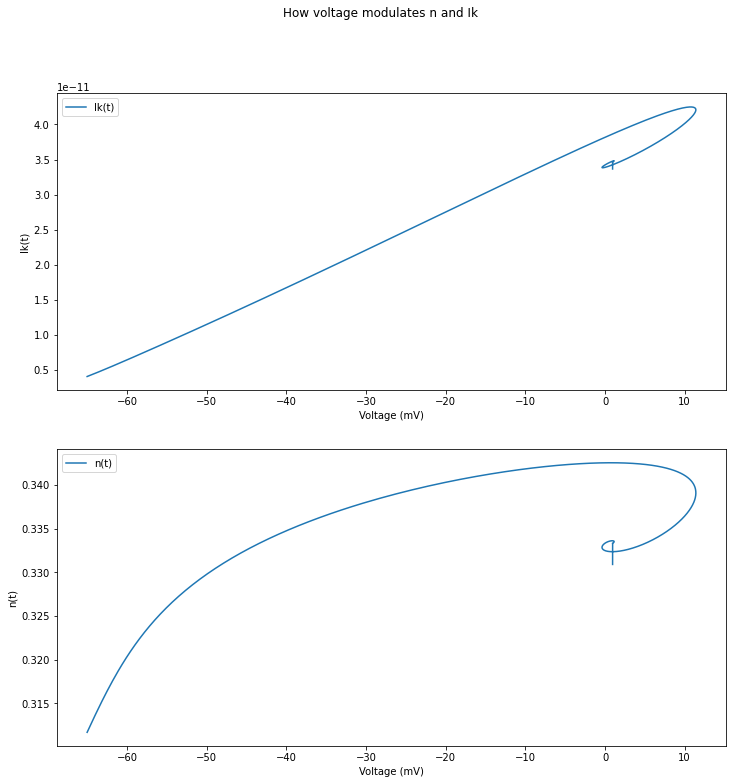

In [ ]:
fig, axs = plt.subplots(2, figsize=(12, 12))
fig.suptitle("How voltage modulates n and Ik")

axs[0].plot(voltage_values, k_currents, label = "Ik(t)")
axs[1].plot(voltage_values, n_values, label = "n(t)")

axs[0].set_xlabel("Voltage (mV)")
axs[1].set_xlabel("Voltage (mV)")
axs[0].set_ylabel("Ik(t)")
axs[1].set_ylabel("n(t)")
axs[0].legend()
axs[1].legend()
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.show()


## 3. The firing rate

0.0
1e-12
2e-12
3e-12
4e-12
5e-12
6e-12
7e-12
8e-12
9e-12
1e-11
1.0999999999999999e-11
1.2e-11
1.3e-11
1.4e-11
1.5e-11
1.6e-11
1.7e-11
1.8e-11
1.9e-11


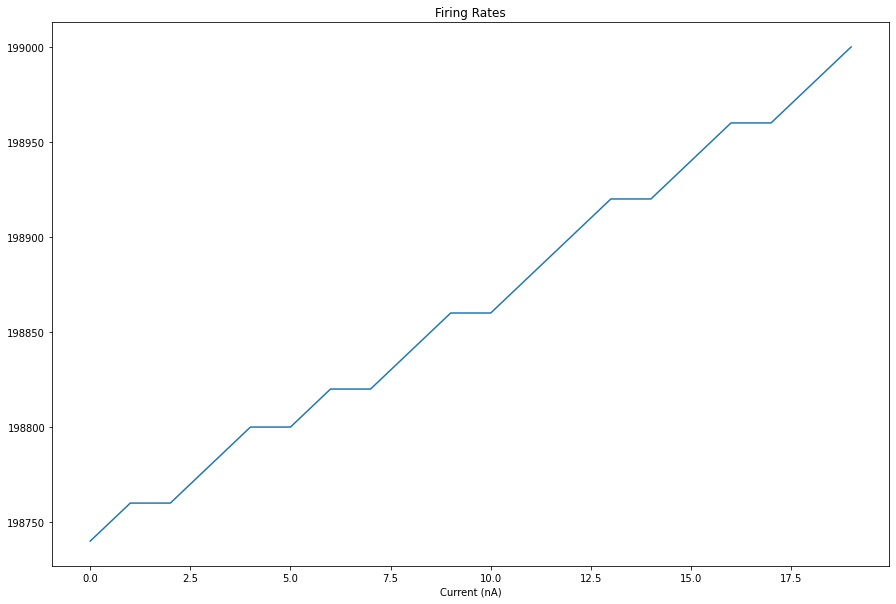

In [ ]:
t_period_1 = 0.05
firing_rates = []
currents = []
for current in np.arange(0,20):
  exp_current = lambda x: current*10**-12
  print(exp_current(232))
  n_spikes = hh_euler(initial_voltage, initial_n, initial_m, initial_h, t_max, dt)[6]
  firing_rates.append(n_spikes/t_period_1)
  currents.append(current)


plt.figure(figsize=(15, 10))
plt.plot(currents, firing_rates)
plt.title("Firing Rates")
plt.xlabel("Current (nA)")
plt.show()
